# SEMANA II - Ejercicios con Scikit-Learn

Este notebook contiene la resolución de los 3 ejercicios prácticos solicitados:

1. **Detección de Fraude** con Regresión Logística  
2. **Análisis de Sentimientos** con SVM  
3. **Detección de Spam** con Naive Bayes  

Cada ejercicio incluye carga de datos de ejemplo, entrenamiento del modelo, evaluación y visualizaciones.


## 1. Detección de Fraude con Regresión Logística

En este ejemplo usaremos un dataset de transacciones con tarjeta de crédito.  
El objetivo es predecir si una transacción es **fraudulenta (1)** o **no fraudulenta (0)**.


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1404
           1       0.75      0.12      0.21        96

    accuracy                           0.94      1500
   macro avg       0.85      0.56      0.59      1500
weighted avg       0.93      0.94      0.92      1500



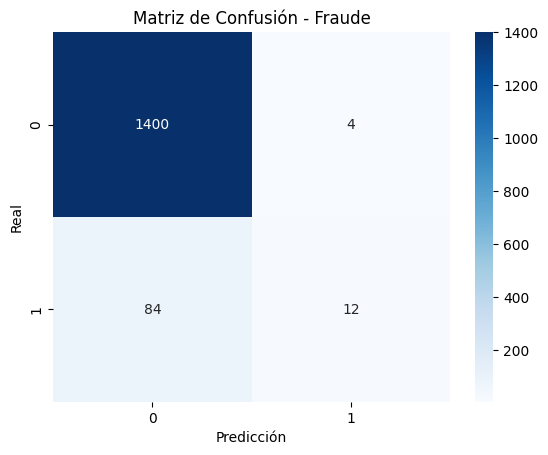

Precisión del modelo: 94.13%


In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Generamos datos sintéticos para simular transacciones
X, y = make_classification(n_samples=5000, n_features=10, 
                           n_informative=5, n_redundant=2,
                           weights=[0.95], flip_y=0.01, random_state=42)

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Fraude")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


## 2. Análisis de Sentimientos con SVM

Clasificaremos reseñas de películas como **positivas** o **negativas** usando un modelo SVM.


Reporte de Clasificación - Sentimientos
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       130
           1       0.91      0.98      0.94        83

    accuracy                           0.95       213
   macro avg       0.95      0.96      0.95       213
weighted avg       0.96      0.95      0.95       213

Precisión del modelo: 95.31%


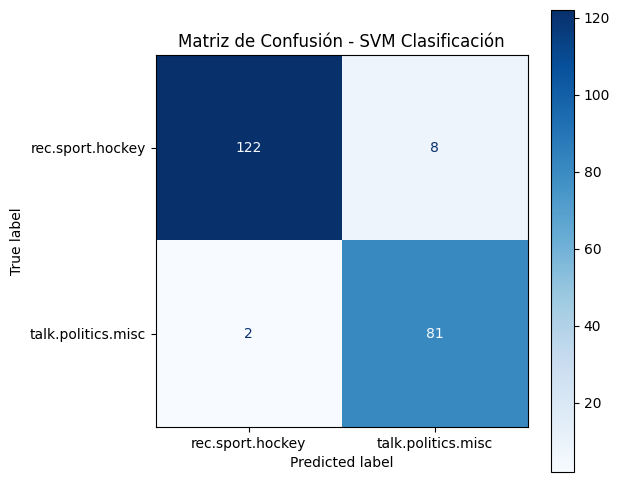

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Cargar datos
categories = ['rec.sport.hockey', 'talk.politics.misc']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'))


# Vectorización de texto
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data.data)
y = data.target

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predicciones
y_pred = svm.predict(X_test)

# Evaluación textual
print("Reporte de Clasificación - Sentimientos")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# === Generar imagen: Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión - SVM Clasificación")
plt.savefig("confusion_matrix.png")  # Guarda la imagen
plt.show()



## 3. Detección de Spam con Naive Bayes

Clasificaremos correos electrónicos como **spam** o **no spam** usando el algoritmo Naive Bayes Multinomial.


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB

# Usamos categorías de emails relacionados a 'sci.space' y 'talk.religion.misc' para simular spam/no spam
categories = ['sci.space', 'talk.religion.misc']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'))

# Vectorización
X = vectorizer.fit_transform(data.data)
y = data.target


# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predicciones
y_pred = nb.predict(X_test)

# Evaluación
print("Reporte de Clasificación - Spam")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Reporte de Clasificación - Spam
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       125
           1       0.98      0.74      0.84        69

    accuracy                           0.90       194
   macro avg       0.93      0.87      0.89       194
weighted avg       0.91      0.90      0.90       194

Precisión del modelo: 90.21%
